# Import

In [1]:
# Basic
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score
from robusta.crossval import *

# Data
from sklearn.datasets import make_moons

# Model
from robusta.semi_supervised import PseudoLabeling
from robusta.testing import get_estimator

# Plot
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

Using TensorFlow backend.


# Data

In [2]:
# Data
X, y = make_moons(1000, noise=0.05)

X = pd.DataFrame(X, columns=['x0', 'x1'])
y = pd.Series(y)

# Sort
index = abs(X.iloc[:,0]-0.5).sort_values(ascending=False).index
X = X.loc[index]
y = y.loc[index]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=False)

<IPython.core.display.Javascript object>


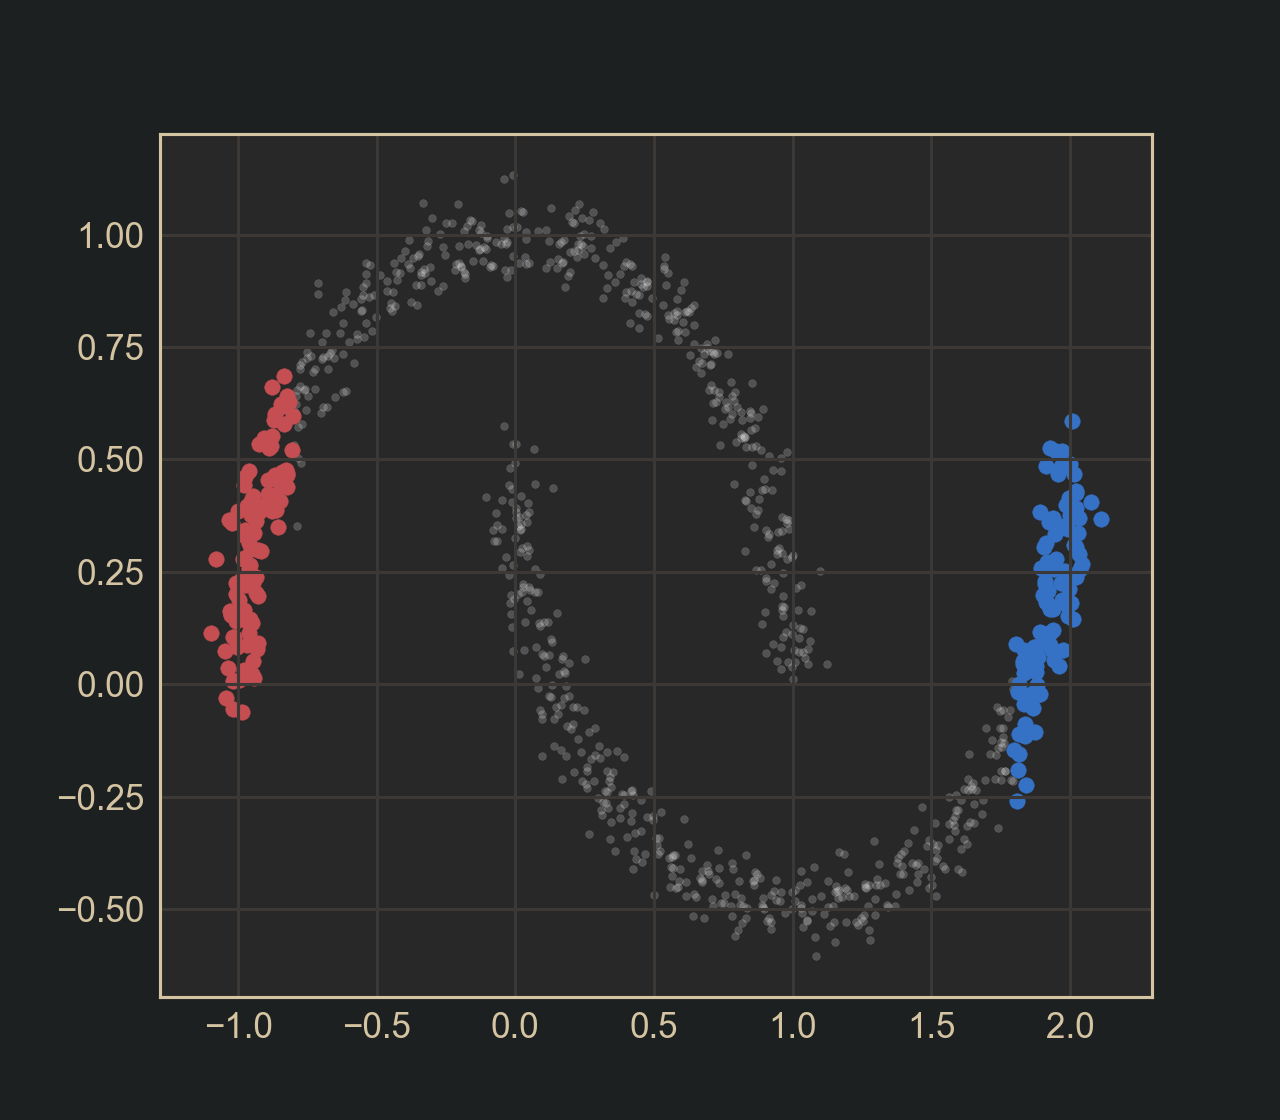

In [3]:
%matplotlib notebook

plt.scatter(X.iloc[:,0], X.iloc[:,1], marker='.', color='w', alpha=0.2)

X0 = X_train[y_train == 0]
plt.scatter(X0.iloc[:,0], X0.iloc[:,1], color='r', alpha=1)
plt.show()

X1 = X_train[y_train == 1]
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], color='b', alpha=1)
plt.show()

# Plot

In [4]:
def plot_decision_function(clf, xlim=[0, 1], ylim=[0, 1], h=0.01, 
                           alpha=.8, cmap='icefire', ax=None):
    
    xx, yy = np.meshgrid(np.arange(*xlim, h), np.arange(*ylim, h))
    zz = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    plt.contour(xx, yy, zz, alpha=alpha, linestyles=[':', '-', ':'],
                colors=['w', 'w', 'w'], levels=[-1., 0, 1.])
    plt.show()

# SVM

In [5]:
estimator = get_estimator('SVM', 'classifier', probability=True, gamma=10, C=0.1)

y_pred = estimator.fit(X_train, y_train).predict_proba(X_test)
y_pred = pd.DataFrame(y_pred, index=X_test.index)

roc_auc_score(y_test, y_pred.iloc[:,1])

0.7281682042051052

<IPython.core.display.Javascript object>


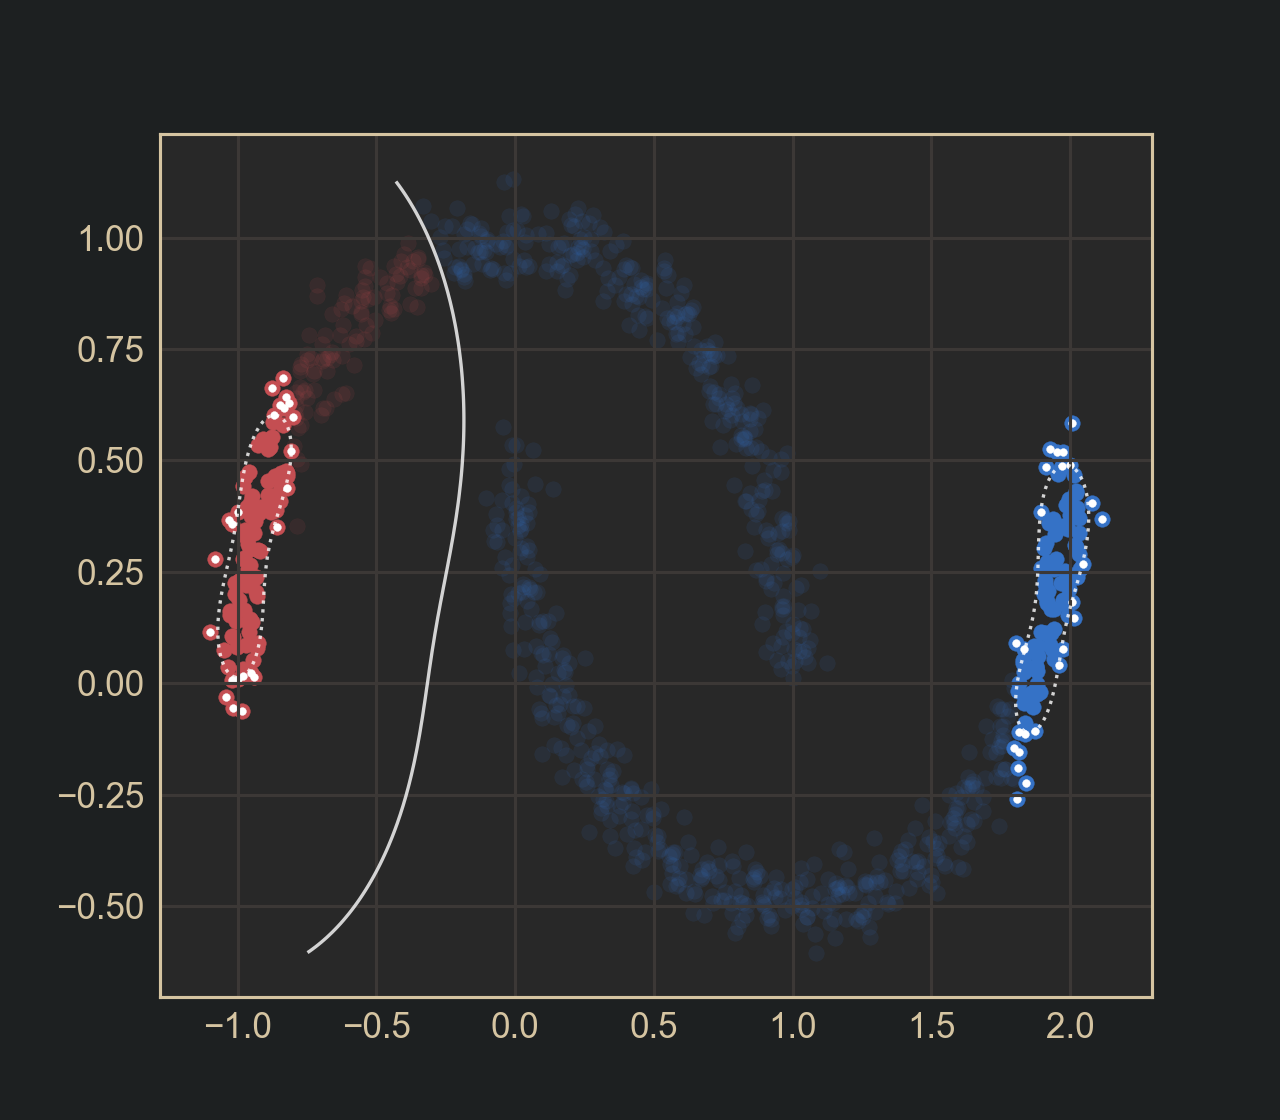

In [6]:
%matplotlib notebook

# Desicion Function
xlim = [X.iloc[:,0].min(), X.iloc[:,0].max()]
ylim = [X.iloc[:,1].min(), X.iloc[:,1].max()]
plot_decision_function(estimator, xlim, ylim)

# Train set
X0 = X_train[y_train == 0]
plt.scatter(X0.iloc[:,0], X0.iloc[:,1], color='r', alpha=1)
plt.show()

X1 = X_train[y_train == 1]
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], color='b', alpha=1)
plt.show()

# Predictions
X0 = X_test[y_pred.iloc[:,0] > 0.5]
plt.scatter(X0.iloc[:,0], X0.iloc[:,1], color='r', alpha=0.1)
plt.show()

X1 = X_test[y_pred.iloc[:,1] > 0.5]
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], color='b', alpha=0.1)

# Support vectors
SV = estimator.support_vectors_
plt.scatter(SV[:,0], SV[:,1], marker='.', color='w', alpha=1)

plt.show()

# SVM + Pseudo-Labeling

In [7]:
estimator = get_estimator('SVM', 'classifier', probability=True, gamma=10, C=0.1)
pl = PseudoLabeling(estimator, verbose=1, proba=0.9)

y_pred = pl.fit(X_train, y_train).predict_proba(X_test)
y_pred = pd.DataFrame(y_pred, index=X_test.index)

roc_auc_score(y_test, y_pred.iloc[:,1])

[17:43:47] ITER 2: Add 82 items
[17:43:47] ITER 3: Add 68 items
[17:43:47] ITER 4: Add 66 items
[17:43:47] ITER 5: Add 79 items
[17:43:47] ITER 6: Add 69 items
[17:43:47] ITER 7: Add 77 items
[17:43:47] ITER 8: Add 81 items
[17:43:47] ITER 9: Add 76 items
[17:43:47] ITER 10: Add 81 items
[17:43:47] ITER 11: Add 79 items
[17:43:48] ITER 12: Add 40 items
[17:43:48] ITER 13: Add 2 items


1.0

<IPython.core.display.Javascript object>


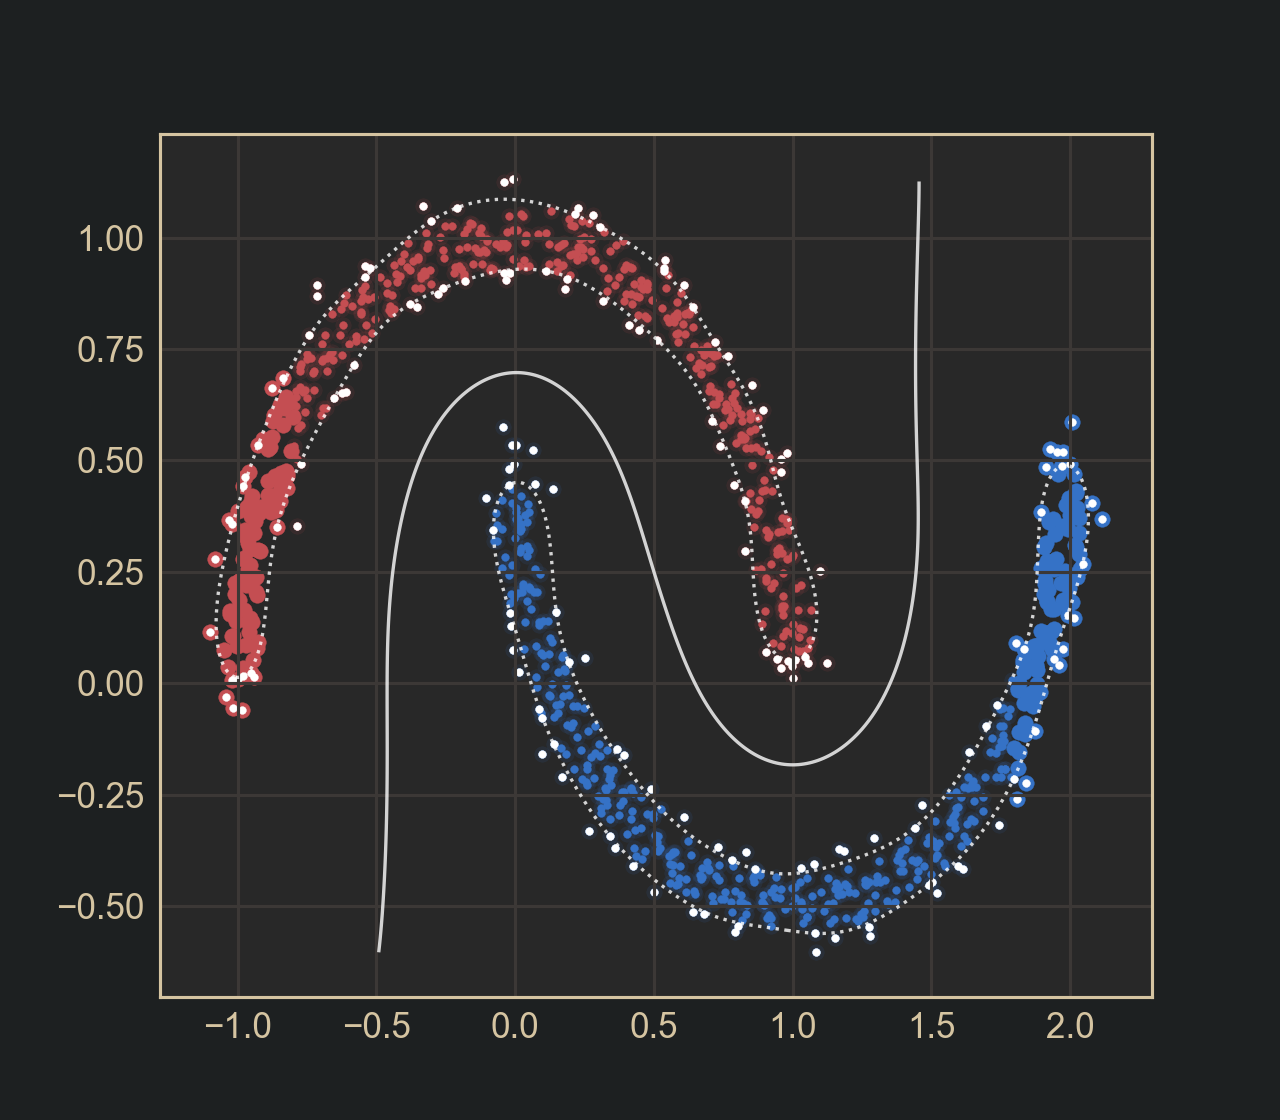

In [8]:
%matplotlib notebook

# Desicion Function
xlim = [X.iloc[:,0].min(), X.iloc[:,0].max()]
ylim = [X.iloc[:,1].min(), X.iloc[:,1].max()]
plot_decision_function(pl.estimator_, xlim, ylim)

# Train set
X0 = X_train[y_train == 0]
plt.scatter(X0.iloc[:,0], X0.iloc[:,1], color='r', alpha=1)
plt.show()

X1 = X_train[y_train == 1]
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], color='b', alpha=1)
plt.show()

# Predictions
X0 = X_test[y_pred.iloc[:,0] > 0.5]
plt.scatter(X0.iloc[:,0], X0.iloc[:,1], color='r', alpha=0.1)
plt.show()

X1 = X_test[y_pred.iloc[:,1] > 0.5]
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], color='b', alpha=0.1)

# Pseudo Labels
X0 = pl.X_[pl.y_ == 0]
plt.scatter(X0.iloc[:,0], X0.iloc[:,1], marker='.', color='r')
plt.show()

X1 = pl.X_[pl.y_ == 1]
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], marker='.', color='b')
plt.show()

# Support vectors
SV = pl.estimator_.support_vectors_
plt.scatter(SV[:,0], SV[:,1], marker='.', color='w')

plt.show()